# Decodifica di Hamming

Nelle telecomunicazioni i canali su cui viaggia l'informazione non sempre sono ideali. La richiesta che un canale sia privo di rumore, ovvero che un messaggio ricevuto non abbia subito delle modifiche durante il suo viaggio e che sia rimasto uguale quello inviato, è una richiesta molto forte.

Come possiamo modellizzare la presenza di rumore? Due comunicatori, che chiamiamo Alice e Bob, si scambiano una sequenza di bit su un canale. ${a_1, a_2, a_3, \cdots}$ sono i bit inviati da Alice, ${b_1, b_2, b_3, \cdots}$ sono i bit letti da Bob, dove $a_i,b_i \in \left\{0, 1\right\}$. Nel canale i bit non vengono dispersi (se entrano $N$ bit, escono $N$ bit) e il rumore è descritto da una probabilità non nulla $p_e$ che avvenga un *bit-flip* su un simbolo $a_i$ inviato da Alice

$$ p_e = P(a_i = 0 | b_i = 1) =  P(a_i = 1 | b_i = 0) \textrm{.}$$

Questa probabilità non dipende dal tempo o dal messaggio ma solo dal canale, che per essere "decente" deve avere $p_e \ll \frac{1}{2}$.

### Ridondanza

A livello logico l'informazione è data da una sequenza di bit e gli errori consistono in delle modifiche casuali nella sequenza. L'idea è quindi di inviare dell'informazione in eccesso rispetto a quella da trasmettere e sfruttare questa ridondanza per individuare e correggere gli errori. Un protocollo di questo tipo potrebbe consistere nell'inviare $2k+1$ volte lo stesso bit e in fase di decodifica correggere l'errore usando il bit in maggioranza, ma sarebbe molto costoso in termini di *overhead* (bit aggiuntive a quelli informativi).

### Parità

Dato un messaggio di $N$ bit $b_1, \cdots, b_N$, un *<u>parity-check</u>* consiste nell'aggiunge un bit $c_p$ che consente di rilevare la presenza di un qualsiasi numero <u>dispari</u> di errori.

$$ \left( c_p + \sum_{i=1}^{N} b_i \right) \; \% \; 2 = 0 $$

Seppur abbia un costo minimo in termini di memoria, il parity check consente di rilevare solamente la presenza di un numero dispari e non permette di correggerli.

## Codici di Hamming

I codici di Hamming sono una famiglia di codici a blocchi lineari che sfruttano la ridondanza e il controllo di parità per la correzione automatica degli errori.

> **Codice lineare**: codice di correzione degli errori per cui ogni combinazione lineare di parole di codice (*code-words*) è ancora una parola di codice.

Una parola di codice è un elemento standardizzato di un protocollo, che deve rispettare specifiche regole del codice e a cui è assegnato un valore univoco. Siccome i codici di Hamming sono codici binari, combinazioni lineari di parole di codice sono create tramite somme bit a bit modulo $2$.

> **Codice a blocchi**: codice di correzione degli errori che codifica (organizza) i dati in blocchi.

I codici di Hamming sono famiglie di codici binari $(n, k)$ dove per ogni intero $r \ge 2$ c'è una code-word (un blocco) di lunghezza $n = 2^r - 1$ che contiene un messaggio di lunghezza $k = 2^r - r - 1$. Il blocco su cui opera Hamming è dunque dato da un messaggio di $k$ bit completato da un numero $r$ di bit di parità adibiti al controllo degli errori, più un bit che per il momento non serve a nulla,

$$ n = k + r + 1 \textrm{.}$$

Il *rate*, ovvero il rapporto tra la lunghezza del messaggio e del blocco, di un codice di Hamming è $R = k / n = 1 - r / (2^r - 1)$, che è il rate massimo per codici che hanno distanza di Hamming uguale a $3$.

> **Distanza di Hamming**: numero minimo di cambi di bit necessari per andare da una parola di codice valida a un'altra.

Il concetto di distanza è fondamentale poichè ci permette di distinguere due tipologie di codici di Hamming:

- *Single-error correcting* (**SEC**): algoritmo che non fa uso del bit supplementare che ha distanza di Hamming uguale a $3$.

    - Errore singolo: lo invididua e lo corregge.

    - Errore doppio: lo scambia per un errore singolo e lo corregge erroneamente.

    - Errore triplo: sequenza considerata valida dalla decodifica che quindi non apporta alcuna correzione.

- *Single-error correcting double-error detecting* (**SECDEC**): algoritmo che fa uso del bit supplementare per un ulteriore controllo di parità, consentendo di individuare (ma non correggere) fino a $2$ errori nella sequenza ed estendere la distanza a $4$.

    - Errore singolo: lo invididua e lo corregge.

    - Errore doppio: lo individua ma non lo corregge.

    - Errore triplo: lo scambia per un errore singolo e lo corregge erroneamente.

    - Errore quadruplo: sequenza considerata valida dalla decodifica che quindi non apporta alcuna correzione.

Nella seguente tabella vengono riportati diversi codici di Hamming accompagnati dal rispettivo rate.

<div align="center">

| Codice (n,k) | r (bit di parità) | n (lunghezza) | k (bit informativi) | Rate k/n |
|--------------|------------------|--------------|---------------------|----------|
| (3,1)        | 2                | 3            | 1                   | 0.333    |
| (7,4)        | 3                | 7            | 4                   | 0.571    |
| (15,11)      | 4                | 15           | 11                  | 0.733    |
| (31,26)      | 5                | 31           | 26                  | 0.839    |
| (63,57)      | 6                | 63           | 57                  | 0.905    |
| (127,120)    | 7                | 127          | 120                 | 0.945    |
| (255,247)    | 8                | 255          | 247                 | 0.969    |

</div>

Notiamo che all'aumentare della dimensione del blocco l'overhead diminuisce:

$$
\lim_{r \rightarrow + \infty} \frac{k}{n} = \lim_{r \rightarrow + \infty} 1 - r / (2^r - 1) = 1
$$

Il motivo per cui non basta considerare blocchi sempre più grandi è il rate di errore che, come detto, non dipende dal messaggio ma solo dal canale; e poiché la decodifica di Hamming è in grado di individuare e correggere un solo errore per blocco, rispettare l'ipotesi che il numero di errori per blocco sia $\#er \le 1$ diventerebbe sempre più difficile.

## L'algoritmo

Nella logica del codice di Hamming è fondamentale considerare le posizioni dei bit in binario, quindi gli indici della sequenza $1, 2, 3, 4, \cdots$ diventeranno $1, 10, 11, 100, \cdots$ ad esempio i bit di controllo si troveranno in posizione $1$, $10$, $100$, ecc.

L'idea dell'algoritmo di Hamming è la seguente:

1. Le posizioni detite ai bit di parità sono potenze di due: $1, 10, 100, 1000, \cdots$. La particolarità delle potenze di due in binario è che sono sequenze dove il bit all'estrema sinistra è $1$ e gli altri sono $0$.

2. Le altre posizioni, indicizzate da sequenze con due o più bit $1$, contengono i bit di informazione.

3. Ogni bit di informazione è incluso in un insieme unico di $2$ o più bit di parità, determinato dalla forma binaria della sua posizione.

    1. Il bit di parità $1$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la posizione più a destra in una stringa binaria: $1, 11, 101, 111, \cdots$ ($1, 3, 5, 7, \cdots$).

    2. Il bit di parità $2$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la seconda posizione da destra in una stringa binaria: $10- 110, 110-111, 1010-1011 \cdots$ ($2-3, 6-7, 10-11 \cdots$).

    3. Il bit di parità $4$ copre tutte le posizioni di bit che hanno $1$ come bit che occupa la terza posizione da destra in una stringa binaria: $100-111, 1100-1111, 10100-10111 \cdots$ ($4-7, 12-15, 20-23 \cdots$).

    4. In generale ogni bit di parità copre tutti i bit dove l'operazione bit a bit AND tra la posizione del bit di parità e del bit di informazione è non nulla.

>L'operazione bit a bit AND, indicata con $\&$, esegue un confronto tra due variabili dando come risultato una terza variabile che presenta un $1$ in quelle posizioni in cui entrambe le variabili di partenza presentano $1$ e uno $0$ in tutte le altre.

```python
a = 60          # 00111100
b = 240         # 11110000
c = a & b = 48  # 00110000
```

4. Le posizioni dei bit di controllo sono state scelte in maniera tale che l'operazione bit a bit XOR tra tutte le posizioni dei bit che contengono $1$ sia nulla.

> L'operazione bit a bit XOR indicata con $\; \^{} \;$, esegue un confronto tra due variabili dando come risultato una terza variabile che presenta un $1$ in quelle posizioni in cui le due variabili di partenza presentano valori diversi e uno $0$ in tutte le altre posizioni.

```python
a = 60          # 00111100
b = 240         # 11110000
c = a ^ b = 48  # 11001100
```

5. Se il ricevitore riceve una stringa che ha lo XOR degli indici nullo significa che il messaggio non è stato corrotto, altrimenti lo XOR indica l'indice del bit corrotto. Il risultato di questa operazione si chiama *sindrome*.

6. Al bit in posizione $0$, che fino ad ora è stato inutilizzato, si può affidare il compito di controllare la parità globale. Se la sindrome è non nulla e la parità globale è sbagliata c'è un singolo errore che il codice corregge, se la sindrome è non nulla e la parità globale è corretta c'è un doppio errore e si richiede l'invio del codice.

Un altro modo per visualizzare l'algoritmo è tramite un approccio matriciale. Restringiamoci al caso di Hamming $(7,4)$ e introduciamo la matrice generatrice $\bold{G}$ e la matrice di controllo della parità $\bold{H}$:

$$
\bold{G} = \left[ \begin{array}{c|c} \bold{I}_k & \bold{A} \end{array} \right] =
\begin{bmatrix}
1 & 0 & 0 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 & 1 & 1
\end{bmatrix}_{4,7} \textrm{,}
$$

$$
\bold{H} = \left[ \begin{array}{c|c} -\bold{A}^T & \bold{I}_{n-k} \end{array} \right] =
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{bmatrix}_{3,7} \textrm{.}
$$

Applicando la trasposta di $\bold{G}$ a un vettore colonna $\bold{a}$ di $k$ bit di messaggio, e sommando modulo $2$, si ottiene una parola di codice $\bold{x}$ data dai bit di messaggio nelle prime $k$ posizioni e dagli bit di parità nelle successive $r$. Ad esempio per $\bold{a} = \left[1, 0, 1, 0 \right]$:

$$
\mathbf{x}^T = \mathbf{G}^T \mathbf{a}^T = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 1
\end{bmatrix} 
\begin{bmatrix}
1 \\
0 \\
1 \\
0
\end{bmatrix} = 
\begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1
\end{bmatrix} \textrm{.}
$$

Questo risultato rispecchia la struttura a blocchi della matrice generatrice, formata dall'identità $\bold{I}_k$ e dalla matrice $\bold{A}$, costruita elencando tutti i vettori colonna di altezza $k$ indipendenti a due a due. Se consideriamo nuovamente un messaggio $\bold{a}$ e definiamo il vettore $\bold{p} = \bold{a} \bold{A}$ come la lista dei bit di parità, la $j$-esima colonna di $\bold{A}$ dice quali bit di messaggio partecipano al $j$-esimo bit di parità. Ad esempio per il primo bit di parità:

$$
p_1 = \sum_{i=1}^{k} a_i A_{i,1} = \begin{bmatrix} 1 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix}
1 \\
1 \\
0 \\
1
\end{bmatrix} = 1 \cdot 1 + 0 \cdot 1 + 1 \cdot 0 + 0 \cdot 1 = 1
$$

Poiché $\bold{G}$ definisce una parola di codice, per costruzione la matrice di controllo della parità deve essere tale per cui $\bold{H} \bold{G}^T = \bold{0}$. La sindrome $\bold{s}$ ci dà la validità o meno di una generica sequenza di bit $\bold{v}$ tramite $\bold{H}$

$$
\bold{s} = \bold{H} \bold{v}^T
$$

Per la parola di codice $\bold{x}$ appena vista:

$$
\bold{H} \bold{x}^T = \begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 & 0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
1 \\
0 \\
1 \\
0 \\
1 \\
0 \\
1
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
0 
\end{bmatrix}
$$

### Correttezza

È possibile adoperare questo formalismo per verificare la correttezza dell'algoritmo di Hamming.

> **Correttezza**: dato un problema $\mathcal{P}$ e un insieme $\mathcal{I}$ delle istanze, $\mathcal{A}_{\mathcal{P}}$ è un algoritmo per la soluzione di $\mathcal{P}$ se e solo se $\mathcal{A}_{\mathcal{P}}(x) = y$ è una soluzione del problema $\forall x \in \mathcal{I}$.

Dimostrare la correttezza dell'algoritmo di Hamming significa dimostrare che per ogni parola di codice esso è in grado di individuare e correggere un errore, sotto ipotesi $\#er \le 1$. L'individuazione di un errore passa dal calcolo della sindrome

$$
\bold{s} = \bold{H} \bold{v}^T \textrm{,}
$$

che è la soluzione al nostro problema. L'insieme delle istante $\mathcal{I}$ è formato dalle sequenze di bit $\bold{v}$ con al più un errore. Si avranno quindi due casi:

1. <u>Nessun errore</u>: $\bold{v} = \bold{x}$ è una parola di codice, e la soluzione del problema è

    $$
    \bold{s} = \bold{H} \bold{x}^T = \bold{0}
    $$

    In questo caso l'istanza è corretta e l'algoritmo non introduce correzioni.

2. <u>Errore singolo</u>: se avviene un errore singolo questo significa sommare modulo $2$ a $\bold{x}$ un vettore della base canonica $\bold{e}_i$. La soluzione è:

    $$
    \bold{s} = \bold{H} \left( \bold{x} + \bold{e}_i \right)^T = \bold{H} \bold{x}^T + \bold{H} {\bold{e}_i}^T = \bold{H} {\bold{e}_i}^T = \bold{h}_i
    $$

    dove $\bold{h}_i$ è la colonna i-esima della matrice $\bold{H}$, i cui elementi forniscono l'esatta posizione in bit dell'errore. Inoltre, poiché le colonne di $\bold{H}$ sono tutte distinte tra loro, l'algoritmo identifica in maniera univoca la posizione di un errore e lo corregge.

### Pseudocodice - valutazione costi

#### Funzioni ausiliarie



---

```python

# Calcola i bit di parità necessari per un messaggio di k bit
parity_bits(k){

    r ← 0

    WHILE 2^r < k + r + 1:
        r ← r + 1

    return [2^0, 2^1, 2^2, ..., 2^(r-1)]    # ritorna la lista delle posizioni dei bit di parità
}


# Determina le posizioni dei bit di messaggio nel blocco
message_bits(k){

    r ← LENGTH(parity_bits(k))  # numero dei bit di parità
    data_bits ← []

    FOR i = 1 TO k + r:
        # Controlla se i è una potenza di 2
        # i è potenza di 2 se i & (i-1) == 0 (operazione bit-wise AND)
        IF (i & (i - 1)) ≠ 0 THEN:
            data_bits.append(i)

    return data_bits    # ritorna la lista delle posizioni dei bit di messaggio
}


# Calcola il bit di parità per una data posizione di bit di controllo
parity(parity_pos, block){

    p ← 0

    FOR j = 0 TO LENGTH(block) - 1:
        # se (j & parity_pos) ≠ 0, j è controllato da questo bit di parità in parity_pos
        IF (j & parity_pos) ≠ 0 THEN:
            p ← p XOR block[j]

    return p
}


# Calcola la parità globale (XOR di tutti i bit)
global_parity(block){

    sum ← 0

    FOR i = 0 TO LENGTH(block) - 1:
        sum ← sum + block[i]

    return sum MOD 2
}


# Inverte il valore di un singolo bit (0→1, 1→0)
bitflip(bit){

    IF bit == 1 THEN:
        return 0
    ELSE:
        return 1
}


# Introduce errori casuali nel blocco con una data probabilità
make_errors(block, error_probability){

    block_with_errors ← []

    FOR i = 0 TO LENGTH(block) - 1:
        random_value ← RANDOM(0, 1)
        IF random_value < error_probability THEN:
            # introduci errore con probabilità p_e
            block_with_errors.append(bitflip(block[i]))
        ELSE:
            # nessun errore
            block_with_errors.append(block[i])

    return block_with_errors
}


# Calcola la sindrome (identifica la posizione dell'errore tramite XOR dei bit)
sindrome(received_block){

    s ← 0

    FOR i = 1 TO LENGTH(received_block) - 1:
        IF received_block[i] == 1 THEN:
            s ← s XOR i # se il bit i-esimo è uguale a 1 aggiorna la sindrome sommando modulo 2 (tramite XOR) il bit i-esimo a s

    return s
}

```

---

#### Codifica



---
```python

# Costruisce il blocco codificato inserendo il messaggio e calcolando i bit di parità
block_builder(message_data){

    k ← LENGTH(message_data)
    parity_bits ← parity_bits(k)
    message_bits ← message_bits(k)
    r ← LENGTH(parity_bits)
    n ← k + r + 1
    
    # Inizializza il blocco con tutti 0
    block ← ARRAY(n) initialized to 0
    
    # Inserisci i bit di messaggio nelle loro posizioni
    message_index ← 0
    FOR each position i IN message_bits:
        block[i] ← message_data[message_index]
        message_index ← message_index + 1
    
    # Calcola e inserisci i bit di parità nelle loro posizioni
    FOR each position i IN parity_bits:
        block[i] ← parity(i, block)
    
    # Inserisci il bit di parità globale in posizione 0
    block[0] ← global_parity(block)
    
    return block
}
```

---

Valutiamo il costo in tempo di ciascuna operazione in funzione della dimensione dell'istanza nel *worst-case*

$$
T_{\textrm{encoding}}(n) = \underbrace{c_1 \cdot \overbrace{r}^{\log_{2}(n - 1)}}_{\substack{\textrm{definizione} \\ \textrm{parity bits}}} + \underbrace{c_2 \cdot \overbrace{(k + r)}^{n - 1}}_{\substack{\textrm{definizione} \\ \textrm{message bits}}} + \underbrace{c_3 \cdot \overbrace{k}^{\sim \; n}}_{\substack{\textrm{inserimento} \\ \text{message bits}}} + c_4 \cdot r \cdot 



#### Decodifica



---
```python

# Decodifica il blocco rilevando e correggendo errori singoli (con supporto SECDED opzionale)
hamming(received_block, use_secded){
    
    s ← sindrome(received_block)
    
    # CASO 1: Nessun errore rilevato
    IF s == 0 THEN:
        return received_block
    END IF
    
    # CASO 2: Errore rilevato
    ELSE:
        # Correggi il bit in posizione s
        received_block[s] ← received_block[s] XOR 1
        
        # Se non usiamo SECDED, ritorna il blocco corretto
        IF use_secded == FALSE THEN:
            return received_block
        
        # Se usiamo SECDED, controlla ulteriormente
        ELSE:
            # Verifica il bit di parità globale del blocco corretto
            IF global_parity(received_block) == 0 THEN:
                # Errore singolo corretto correttamente
                return received_block
            ELSE:
                # Errore doppio rilevato (non correggibile)
            
                return DOUBLE_ERROR_DETECTED
}
```
---

Valutiamo la complessità dell'algoritmo nel *worst case*: poiché all'interno di questa funzione ci sono diversi ```if``` consideriamo la strada sulla quale si incontrano più operazioni possibili.

$$
T_{\textrm{sindrome}}(n) = ( c_{\textrm{assegnamento}} + c_{\textrm{operazione}} ) \cdot (n - 1)
$$
$$
T_{\textrm{correzione}}(n) = ( c_{\textrm{assegnamento}} + c_{\textrm{operazione}} )
$$
$$
T_{\textrm{parità globale}}(n) = ( c_{\textrm{assegnamento}} + c_{\textrm{operazione}} ) \cdot n + c_{\textrm{operazione}}
$$
$$
\implies T_{\textrm{decodifica}}(n) = a \cdot n + c
$$

dove $a = ( c_{\textrm{assegnamento}} + c_{\textrm{operazione}} )$ e $c$ comprende operazioni singole ed assegnamenti vari. Dunque vediamo che l'operazione di decodifica ha un costo lineare $\mathcal{O}(n)$.

## Implementazione

In [14]:
# importiamo le librerie e definiamo le funzioni necessarie

import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle    # permette di disegnare e colorare aree piene

# funzione che calcola le posizioni dei bit di parità
# prende in input la lunghezza del messaggio
def parity_bits(k):
    r = 0
    while (2**r) < (k + r + 1):
        r += 1
    return [2**i for i in range(r)]

# funzione che calcola le posizioni dei bit riservati al messaggio
# prende in input la lunghezza del messaggio
def message_bits(k):
    r = len(parity_bits(k)) # numero dei bit di parità
    data_bits = []
    for i in range(1, k + r + 1):   # l'elemento con indice 0 è inutilizzato o riservato al bit di parità globale
        # verifica se 'i' non è una potenza di 2 usando l'operatore bitwise AND (&)
        # se i è potenza di 2 (es. 1, 2, 4, 8), 'i & (i-1)' è sempre 0
        if (i & (i - 1)) != 0:
            data_bits.append(i)
    return data_bits

# funzione che calcola la parità per un bit di parità specifico
# prende in input l'indice del bit di parità e i dati correnti
def parity(i, block):
    parity = 0
    for j in range(i+1, len(block)):
        if j & i:  # Se il risultato dell'AND è diverso da zero, significa che la posizione 'j' è controllata dal bit di parità corrente
            parity ^= block[j]  # il comando '^' è lo XOR per calcolare la parità
    return parity

# funzione che calcola la parità globale del blocco
# prende in input i dati correnti
def global_parity(block):
    return sum(block) % 2

# funzione che costruisce il blocco di bit a partire dal messaggio
def block_builder(data):
    k = len(data)
    paritybits = parity_bits(k)
    messagebits = message_bits(k)
    r = len(paritybits)
    n = k + r + 1
    block = [0] * (n) 
    # inseriamo nelle loro posizioni: bit di messaggio, bit di parità, bit di parità globale
    message_idx = 0
    for i in messagebits:
        block[i] = data[message_idx]
        message_idx += 1
    for i in paritybits:
        block[i] = parity(i, block)
    # calcolo del bit di parità globale
    block[0] = global_parity(block)
    return block

# funzione che effettua un flip di un singolo bit
def bitflip(b):
    if b == 1:
        return 0
    else:
        return 1

# funzione che introduce degli errori con probabilità p su un blocco
def make_errors(block, p):
    block_with_errors = []
    for i in range(len(block)):
        if random.random() < p:
            block_with_errors.append(bitflip(block[i]))
        else:
            block_with_errors.append(block[i])
    return block_with_errors

# funzione che calcola la sindrome del blocco ricevuto
def sindrome(block):
    s = 0
    for i in range(1, len(block)):
        if block[i] == 1:
            s ^= i
    return s

# cuore del codice di Hamming: rileva e corregge l'errore singolo nel blocco ricevuto e se chiediamo di usare il codice di Hamming esteso individua un errore doppio    
def hamming(block, secded):
    s = sindrome(block)         # calcola la sindrome del blocco ricevuto
    if s == 0:
        return block            # nessun errore rilevato
    else:
        block[s] ^= 1           # Corregge l'errore
        if (secded == False):
            return block
        else:
            if global_parity(block) == 0:
                return block    # errore singolo corretto
            else:
                return 2        # errore multiplo rilevato, chiediamo di reinviare il blocco

In [15]:
# generiamo una sequenza randomica di k bit
k = 4 # lunghezza del messaggio in bit per ogni blocco
bit_sequence = [random.randint(0, 1) for _ in range(k)]
print(bit_sequence)

[1, 0, 1, 1]


In [16]:
block = block_builder(bit_sequence)
print(block)

[0, 0, 1, 1, 0, 0, 1, 1]


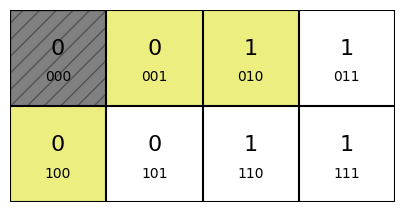

In [17]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_xlim(0, 4)   # asse x: 4 colonne
ax.set_ylim(0, 2)   # asse y: 2 righe

# Disegno della griglia
for x in range(5):
    ax.plot([x, x], # ascissa iniziale e finale
            [0, 2], # ordinata iniziale e finale
            color = "black")
for y in range(3):
    ax.plot([0, 4], [y, y], color = "black")

# celle quadrate
ax.set_aspect('equal')

# Riempimento celle
for idx, bit in enumerate(block):
    row = 1 - idx // 4                  # indicizza le righe, "1 -" serve a mettere la prima riga in alto (le coordinate di matplotlib crescono verso l’alto)
    col = idx % 4                       # indicizza le colonne
    # siamo nell'area che va da col e col+1 e da row a row+1
    if idx == 0:
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "gray",         # colore di riempimento    
                      edgecolor = "#545454",
                      hatch = '//')                # texture diversa per il bit di parità globale
        )
    elif idx in parity_bits(k):
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "#ecef7f",    # colore di riempimento    
                      edgecolor = 'none')
        )

    binary_index = format(idx, "03b")   # converte idx in binario

    ax.text(col + 0.5, row + 0.6, f"{bit}",
            ha = 'center', va = 'center',   # allineamenti rispetto alla coordinata (x,y)
            fontsize = 16
            )  # scrittura del bit
    ax.text(col + 0.5, row + 0.3, f"{binary_index}",
            ha = 'center', va = 'center', fontsize = 10)  # scrittura dell'indice in binario

ax.axis('off')
plt.show()

In [20]:
block_with_errors = make_errors(block, 0.08)
print(block_with_errors)


[0, 0, 1, 1, 1, 0, 1, 1]


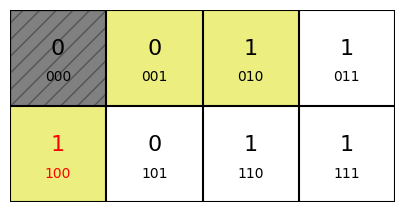

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_xlim(0, 4)   # asse x: 4 colonne
ax.set_ylim(0, 2)   # asse y: 2 righe

# Disegno della griglia
for x in range(5):
    ax.plot([x, x], # ascissa iniziale e finale
            [0, 2], # ordinata iniziale e finale
            color = "black")
for y in range(3):
    ax.plot([0, 4], [y, y], color = "black")

# celle quadrate
ax.set_aspect('equal')

# Riempimento celle
for idx, bit in enumerate(block_with_errors):
    row = 1 - idx // 4                  # indicizza le righe, "1 -" serve a mettere la prima riga in alto (le coordinate di matplotlib crescono verso l’alto)
    col = idx % 4                       # indicizza le colonne
    # siamo nell'area che va da col e col+1 e da row a row+1
    if idx == 0:
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "gray",         # colore di riempimento    
                      edgecolor = "#545454",
                      hatch = '//')                # texture diversa per il bit di parità globale
        )
    elif idx in parity_bits(k):
        ax.add_patch(
            Rectangle((col, row),               # angolo in basso a sinistra
                      1, 1,                     # larghezza e altezza
                      facecolor = "#ecef7f",    # colore di riempimento    
                      edgecolor = 'none')
        )

    binary_index = format(idx, "03b")   # converte idx in binario

    # se idx è tra i bit modificati, testo rosso, altrimenti nero
    text_color = "red" if idx in [i for i in range(len(block)) if block[i] != block_with_errors[i]] else "black"

    ax.text(col + 0.5, row + 0.6, f"{bit}",
            ha = 'center', va = 'center',   # allineamenti rispetto alla coordinata (x,y)
            fontsize = 16, color = text_color
            )  # scrittura del bit
    ax.text(col + 0.5, row + 0.3, f"{binary_index}",
            ha = 'center', va = 'center', fontsize = 10, color = text_color
            )  # scrittura dell'indice in binario

ax.axis('off')
plt.show()

In [28]:
print(hamming(block_with_errors, secded=False))

Nessun errore rilevato: blocco corretto.
[0, 1, 0, 1, 0, 1, 0, 1]


In [4]:
# 'with' è un "gestore di contesto": garantisce che il file venga chiuso automaticamente non appena finiamo di leggere, evitando sprechi di memoria o errori di sistema
# questo comando apre il file "Alice.txt" in modalità lettura
with open("Alice.txt", "r") as file:
    # legge tutto il contenuto del file e rimuove eventuali spazi bianchi iniziali/finali
    input_str = file.read().strip() # stringa di input

print(input_str)

Ciao Bob!


In [5]:
# converte una stringa in una rappresentazione binaria, dove ogni carattere è rappresentato da 8 bit come lista di numeri
def string_to_binary(s):
    # per ogni carattere 'c' nella stringa, ottiene il codice ASCII con ord(c),
    # format(..., '08b') lo converte in binario con 8 bit con padding di zeri a sinistra, e crea una lista di interi
    # il ciclo più esterno (il primo) itera sui caratteri della stringa
    # il ciclo interno (il secondo) itera sui bit della stringa binaria di quel carattere e li converte in interi
    return [int(b) for c in s for b in format(ord(c), '08b')]

# lista che contiene il messaggio in rappresentazione binaria
input_bin = string_to_binary(input_str)

print(input_bin)

[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [6]:
r = len(parity_bits(k))  # numero dei bit di parità
n = 1 + k + r  # lunghezza del blocco (incluso il bit di parità globale)

# lista che conterrà i blocchi di dati da inviare (bit di messaggio + bit di parità)
sent_data = []

# dividi la lista "input_bin" in sottoliste di k bit ciascuna
input_bin_div = [input_bin[i:i+k] for i in range(0, len(input_bin), k)]

# ciclo sulle divisioni del messaggio originario
for i in range(0, len(input_bin_div)):
    message = input_bin_div[i]  # estraiamo il blocco di k bit dal messaggio originale
    sent_data.append(block_builder(message))

print(input_bin_div)
print(sent_data)

[[0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
[[0, 1, 0, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0, 0, 1]]


In [ ]:
# introduciamo degli errori casuali
p = 0.05  # probabilità di errore (bit flip)
# send = 1
sent_data_with_errors = []
for i in range(len(sent_data)):
    sent_data_with_errors.append(make_errors(sent_data[i]))

print(sent_data)
print(sent_data_with_errors)

[[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0, 0, 1]]
[[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 1, 1, 0, 1, 0], [0, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 0, 0, 1]]


In [ ]:
output_bin_with_errors = []

for i in range(len(sent_data_with_errors)):
    message = [sent_data_with_errors[i][j] for j in message_bits(k)]
    output_bin_with_errors.extend(message)

# converte una lista di bit (numeri 0 o 1) in una stringa alfanumerica
def binary_to_string(binary_list):
    # lista per raccogliere i caratteri convertiti
    result = []
    # itera sulla lista binaria a passi di 8 bit
    for i in range(0, len(binary_list), 8):
        # estrae un blocco di 8 bit
        byte = binary_list[i:i+8]
        # se il blocco ha esattamente 8 bit, lo converte
        if len(byte) == 8:
            # converte la lista in stringa binaria, poi in intero, poi in carattere ASCII
            byte_str = ''.join(str(b) for b in byte)
            char = chr(int(byte_str, 2))
            result.append(char)
    # unisce tutti i caratteri in una stringa
    return ''.join(result)

# output_str = binary_to_string(output_bin)
print(output_bin_with_errors)
output_str = binary_to_string(output_bin_with_errors)
print(output_str)

[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Kian Rob!


In [ ]:
print(sent_data)
print(sent_data_with_errors)

sent_data_corrected = []
for i in range(len(sent_data_with_errors)):
    send = 1
    while send == 1:
        send = hamming(sent_data_with_errors[i], True)
    sent_data_corrected.append(send)

print(sent_data_corrected)

[[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0, 0, 1]]
[[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 1, 1, 0, 1, 0], [0, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 0, 0, 1]]
[[1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [0, 1, 1,

In [21]:
output_bin_corrected = []

for i in range(len(sent_data_corrected)):
    message = [sent_data_corrected[i][j] for j in message_bits(k)]
    output_bin_corrected.extend(message)

output_str = binary_to_string(output_bin_corrected)
print(output_str)

Ciao Bob!
